# Ch.4 분류

### Logistic Regression

In [4]:
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

In [5]:
from sklearn.datasets import load_iris
iris = load_iris()

In [6]:
# Numpy는 [:5], pandas는 head

In [7]:
# data, target, target_names, DESCR
data = iris.data
label = iris.target
columns = iris.feature_names
df = pd.DataFrame(data, columns = columns)
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [8]:
from sklearn.model_selection import train_test_split
X_train, x_test, y_train, y_test = \
    train_test_split(data, label, test_size = 0.2,
                 shuffle=True, stratify=label, random_state=2019)

- 모델 객체 생성

In [9]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(verbose=1)

- 모델 학습

In [10]:
lr.fit(X_train, y_train)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=1,
                   warm_start=False)

- 예측 (결과 확인)

In [11]:
y_pred = lr.predict(x_test)

In [12]:
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test, y_pred))

0.9666666666666667


In [13]:
lr.coef_

array([[-0.4331758 ,  0.82135237, -2.39403865, -0.96776796],
       [ 0.49039201, -0.29955397, -0.15924469, -0.91532022],
       [-0.05721621, -0.5217984 ,  2.55328334,  1.88308818]])

In [14]:
lr.intercept_

array([  9.79503679,   2.02943481, -11.8244716 ])

In [15]:
y_pred_lr = lr.predict(x_test)

In [16]:
# 로지스틱 회귀 정확도
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)

0.9666666666666667

In [17]:
lr.coef_ #  Coefficient = Weight

array([[-0.4331758 ,  0.82135237, -2.39403865, -0.96776796],
       [ 0.49039201, -0.29955397, -0.15924469, -0.91532022],
       [-0.05721621, -0.5217984 ,  2.55328334,  1.88308818]])

In [18]:
lr.intercept_ # intercept = bias

array([  9.79503679,   2.02943481, -11.8244716 ])

In [19]:
## support Vector Machine
from sklearn.svm import SVC

In [20]:
sv = SVC()

In [21]:
sv.fit(X_train, y_train)
y_pred_sv = sv.predict(x_test)

In [22]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)

0.9666666666666667

## Decision Tree

In [23]:
from sklearn.tree import DecisionTreeClassifier

In [24]:
dcl = DecisionTreeClassifier()

In [25]:
dcl.fit(X_train, y_train)
y_pred_dcl = dcl.predict(x_test)

In [26]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)

0.9666666666666667

In [27]:
### 결과값 비교
df = pd.DataFrame({'LR' : y_pred_lr, 'SVC' : y_pred_sv, 'DT' : y_pred_dcl, '정답' : y_test})

In [28]:
df

,LR,SVC,DT,정답
0,1,1,1,1
1,1,1,1,1
2,2,2,2,2
3,2,2,2,2
4,2,2,2,2
5,0,0,0,0
6,0,0,0,0
7,0,0,0,0
8,0,0,0,0
9,0,0,0,0


In [29]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

dt_clf = DecisionTreeClassifier(random_state=156)

iris_data = load_iris()
X_train, X_test, y_train, y_test = train_test_split(iris_data.data, iris_data.target,
                                                   test_size=0.2, random_state=11)

dt_clf.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=156, splitter='best')

In [30]:
from sklearn.tree import export_graphviz

export_graphviz(dt_clf, out_file="tree.dot", class_names=iris_data.target_names, \
                feature_names = iris_data.feature_names, impurity=True, filled=True)

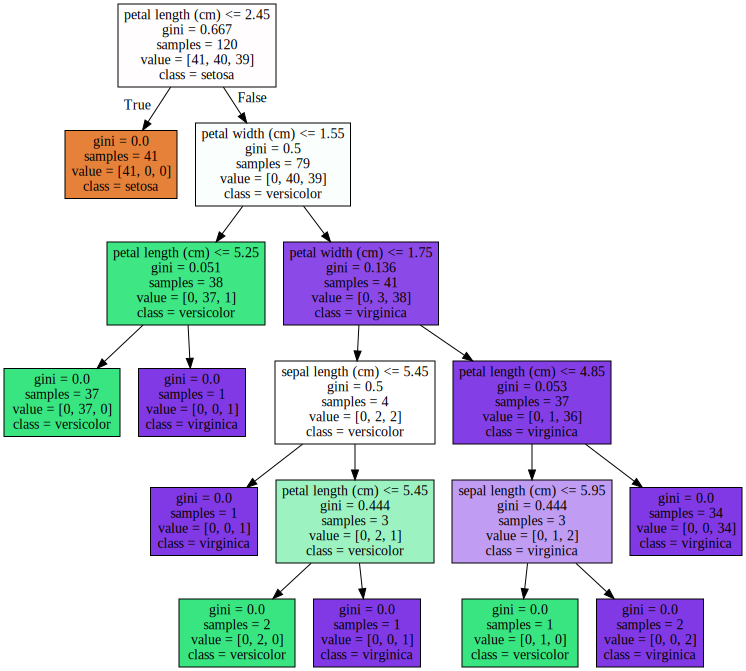

In [31]:
import graphviz
with open("tree.dot") as f:
    dot_graph = f.read()
graphviz.Source(dot_graph)

### 제약 조건
- max_depth = 3

In [32]:
dt_clf2 = DecisionTreeClassifier(max_depth = 3, random_state=156)
dt_clf2.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=3, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=156, splitter='best')

In [33]:
export_graphviz(dt_clf2, out_file="tree2.dot", class_names=iris_data.target_names, \
                feature_names = iris_data.feature_names, impurity=True, filled=True)

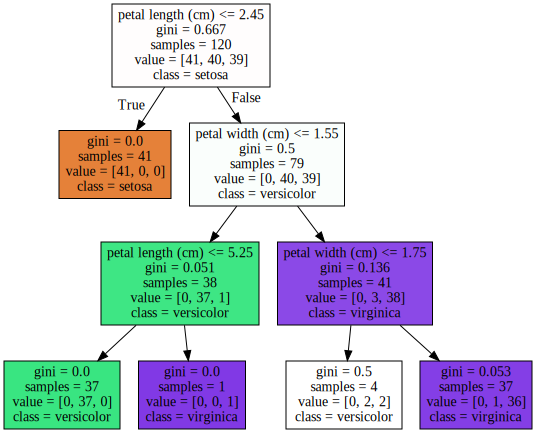

In [34]:
import graphviz
with open("tree2.dot") as f:
    dot_graph = f.read()
graphviz.Source(dot_graph)

In [35]:
y_pred = dt_clf.predict(X_test)
accuracy_score(y_test, y_pred)

0.9333333333333333

In [37]:
y_pred = dt_clf2.predict(X_test)
accuracy_score(y_test, y_pred)

0.9333333333333333

- min_samples_split = 4 인 경우

In [41]:
dt_clf3 = DecisionTreeClassifier(max_depth = 4, random_state=156)
dt_clf3.fit(X_train, y_train)

0.9333333333333333
0.9333333333333333


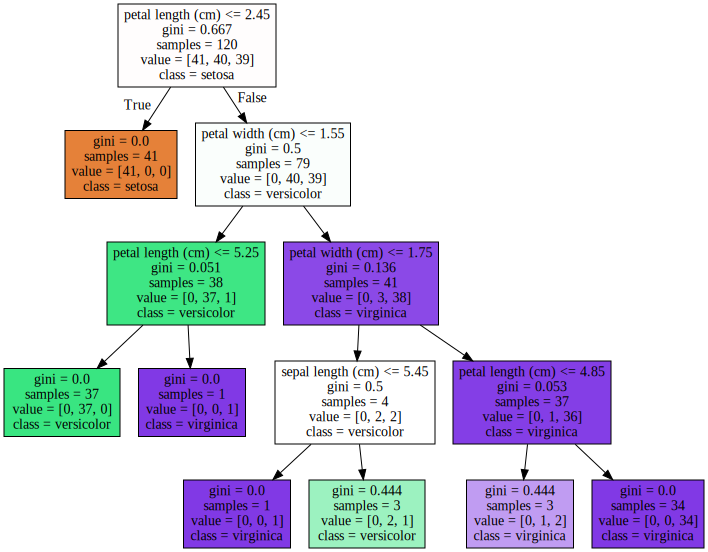

In [42]:
export_graphviz(dt_clf2, out_file="tree3.dot", class_names=iris_data.target_names, \
                feature_names = iris_data.feature_names, impurity=True, filled=True)
import graphviz
with open("tree3.dot") as f:
    dot_graph = f.read()
graphviz.Source(dot_graph)

In [43]:
y_pred = dt_clf3.predict(X_test)
print(accuracy_score(y_test, y_pred))
y_pred = dt_clf.predict(X_test)
print(accuracy_score(y_test, y_pred))

0.9333333333333333
0.9333333333333333


- min_samples_leaf = 4 인 경우

In [47]:
dt_clf4 = DecisionTreeClassifier(min_samples_leaf = 4, random_state=156)
dt_clf4.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=4, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=156, splitter='best')

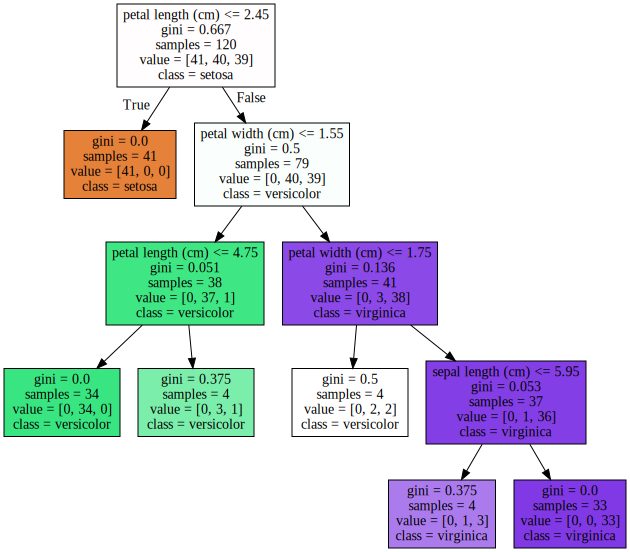

In [48]:
export_graphviz(dt_clf4, out_file="tree3.dot", class_names=iris_data.target_names, \
                feature_names = iris_data.feature_names, impurity=True, filled=True)
import graphviz
with open("tree3.dot") as f:
    dot_graph = f.read()
graphviz.Source(dot_graph)

In [52]:
y_pred = dt_clf4.predict(X_test)
print(accuracy_score(y_test, y_pred))
y_pred = dt_clf.predict(X_test)
print(accuracy_score(y_test, y_pred))

0.9333333333333333
0.9333333333333333


## Feature 중요도

In [54]:
dt_clf.feature_importances_

array([0.02500521, 0.        , 0.55490281, 0.42009198])

In [65]:
dt_clf

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=156, splitter='best')

sepal length (cm) : 0.025
sepal width (cm) : 0.000
petal length (cm) : 0.555
petal width (cm) : 0.420


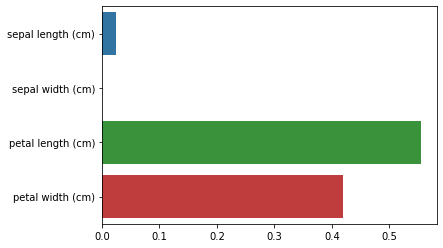

In [69]:
# feature 별 importance 매핑
import seaborn as sns
%matplotlib inline
for name, value in zip(iris_data.feature_names, dt_clf.feature_importances_):
    print('{0} : {1:.3f}'.format(name,value))
    
sns.barplot(x=dt_clf.feature_importances_, y=iris_data.feature_names)